In [1]:
# DEPENDENCIES
import sqlite3
import csv
import re
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import time
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
def text_preprocessing(
    token:str,
    punctuations = r'''!()-[]{};:‘'’"\,<>./?@#$%^&*_“~''')->list:
    token = token.replace("]","")
    token = token.replace("||","")
    token = re.sub(r"""[()\"#/@;:.<>{}`––‘+«’%-=~|!?"“”,']""", "", token)
    token = re.sub(r'[0-9]+','',token)
    token = re.sub("[A-Za-z]","",token)
    token = re.sub(" +"," ", token)
    return token

# getting embedding_dict from tfidf vectoriser with dimensions
max_dim = 50
from sklearn.feature_extraction.text import TfidfVectorizer

# lines_with_value_1 = ["sky sun green what blue","sun yellow bright what"]
list_of_lines_as_strings = []
tags_for_tfidf = []

def tokenize(text:str)->list:
    return (text.split())
with open('/home/balu/cl2/project/datasets/telugu/telugu-dataset-rohit.csv', 'r') as total_file:
    data = csv.reader(total_file)
    # for i in range(1,):
    next(data)
    for line in (data):
    # for (line,i) in zip(data,range(1,100,1)):
        line_string = ''
        for k in reversed(line):
            if(k==''):
                del line[-1:]
            else:
                break
        i = len(line)
        # print(line)
        k = (line[i-2],line[i-1])
        # print(k)
        del line[-2:]
        tags_for_tfidf.append(k)
        for cell in line:
            for token in cell:
                processed_token = text_preprocessing(token)
                # in case of morphology just append the root word from the dictionary
                # if the word doesn't exist in dict then there is a reason in morphological analysis
                # in that case just avoid it.
                if(processed_token != ''):
                    line_string += processed_token
        list_of_lines_as_strings.append(line_string)
print(len(list_of_lines_as_strings))
y_tfidf = []
index = 0
for a in tags_for_tfidf:
    labell = a[0].strip()
    if(labell == "TRS" or labell == "BJP" or labell == "YCP" or labell == "TDP" or labell == "Congress"):
        index = 1
    else:
        index = 0
    y_tfidf.append(index)
vectoriser = TfidfVectorizer(max_features = max_dim,vocabulary = None,tokenizer = tokenize)
tfidf_vectors_for_all_text = vectoriser.fit(list_of_lines_as_strings)
tfidf_vectors_for_all_text = vectoriser.transform(list_of_lines_as_strings)
# print(tfidf_vectors_for_all_text.get_shape())

1325


/home/balu/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

           0       0.49      0.61      0.55        44
           1       0.92      0.87      0.90       221

    accuracy                           0.83       265
   macro avg       0.70      0.74      0.72       265
weighted avg       0.85      0.83      0.84       265



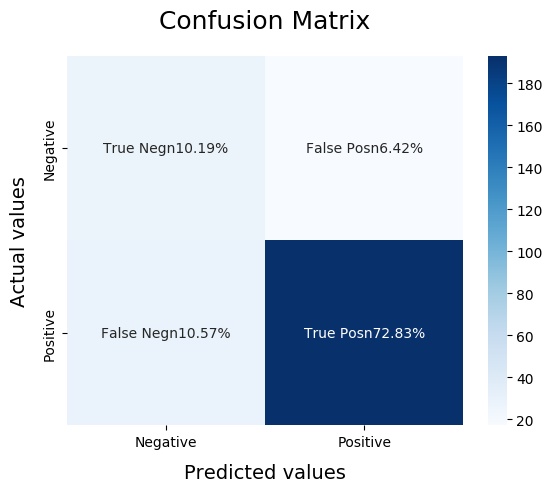

In [3]:
#for tfidf
# TRAININIG BERNOULLI AND TESTING IT
import seaborn as sns

def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors_for_all_text, y_tfidf, test_size=0.2, random_state=26105111)
# print(X_test,y_test)
BNBmodel = BernoulliNB()
start = time.time()
BNBmodel.fit(X_train, y_train)
end = time.time()
# print("The execution time of this model is {:.2f} seconds\n".format(end-start))
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
